In [1]:
import pandas as pd
import yfinance as yf

In [136]:
ticker = ['SPY'] #Change ticker symbol to review any instrument in yahoo finance 
df =yf.download(ticker, interval = '1D',auto_adjust=True, period="1Y")
#2 min data only available in last 60 days 

# df = df.drop(columns = ['Volume', 'Open', 'High', 'Low', 'Adj Close'])
df.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2022-10-25,378.790009,385.250000,378.670013,384.920013,78846300
2022-10-26,381.619995,387.579987,381.350006,382.019989,104087300
2022-10-27,383.070007,385.000000,379.329987,379.980011,81971800
2022-10-28,379.869995,389.519989,379.679993,389.019989,100302000
2022-10-31,386.440002,388.399994,385.260010,386.209991,96631300
2022-11-01,390.140015,390.390015,383.290009,384.519989,85407600
2022-11-02,383.899994,388.630005,374.760010,374.869995,126990400
2022-11-03,371.470001,374.200012,368.790009,371.010010,87100100
2022-11-04,377.000000,378.869995,370.000000,376.350006,103449600


In [137]:
sr_df = df.copy()
sr_df.to_csv('data.csv')

In [138]:
sr_df.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2022-10-25,378.790009,385.250000,378.670013,384.920013,78846300
2022-10-26,381.619995,387.579987,381.350006,382.019989,104087300
2022-10-27,383.070007,385.000000,379.329987,379.980011,81971800
2022-10-28,379.869995,389.519989,379.679993,389.019989,100302000
2022-10-31,386.440002,388.399994,385.260010,386.209991,96631300
2022-11-01,390.140015,390.390015,383.290009,384.519989,85407600
2022-11-02,383.899994,388.630005,374.760010,374.869995,126990400
2022-11-03,371.470001,374.200012,368.790009,371.010010,87100100
2022-11-04,377.000000,378.869995,370.000000,376.350006,103449600


In [139]:
#Check if NA values are in data
sr_df=sr_df[sr_df['Volume']!=0]
sr_df.reset_index(drop=True, inplace=True)
sr_df.isna().sum()
sr_df.tail()

,Open,High,Low,Close,Volume
247,390.140015,390.390015,383.290009,384.519989,85407600
248,383.899994,388.630005,374.760010,374.869995,126990400
249,371.470001,374.200012,368.790009,371.010010,87100100
250,377.000000,378.869995,370.000000,376.350006,103449600
251,377.709991,380.570007,375.529999,379.950012,68116400


In [140]:
def support(df1, l, n1, n2): #n1 n2 before and after candle l
    for i in range(l-n1+1, l+1):
        if(df1.Low[i]>df1.Low[i-1]):
            return 0
    for i in range(l+1,l+n2+1):
        if(df1.Low[i]<df1.Low[i-1]):
            return 0
    return 1

#support(df,46,3,2)

def resistance(df1, l, n1, n2): #n1 n2 before and after candle l
    for i in range(l-n1+1, l+1):
        if(df1.High[i]<df1.High[i-1]):
            return 0
    for i in range(l+1,l+n2+1):
        if(df1.High[i]>df1.High[i-1]):
            return 0
    return 1
#resistance(df, 30, 3, 5)

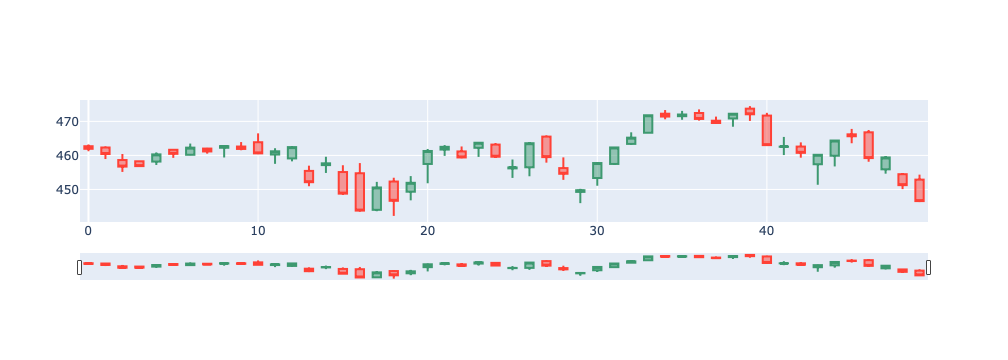

In [141]:
dfpl = sr_df[0:50]
import plotly.graph_objects as go
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

fig.show()

In [142]:
sr = []
n1=5
n2=3
for row in range(n1, (len(sr_df)-n2)): #len(df)-n2
    if support(sr_df, row, n1, n2):
        sr.append((row,sr_df.Low[row],1))
    if resistance(sr_df, row, n1, n2):
        sr.append((row,sr_df.High[row],2))
print(sr)

[(52, 415.9441512869428, 1), (128, 381.9245319583339, 1), (166, 389.0418979580837, 2), (193, 429.963802202433, 2)]


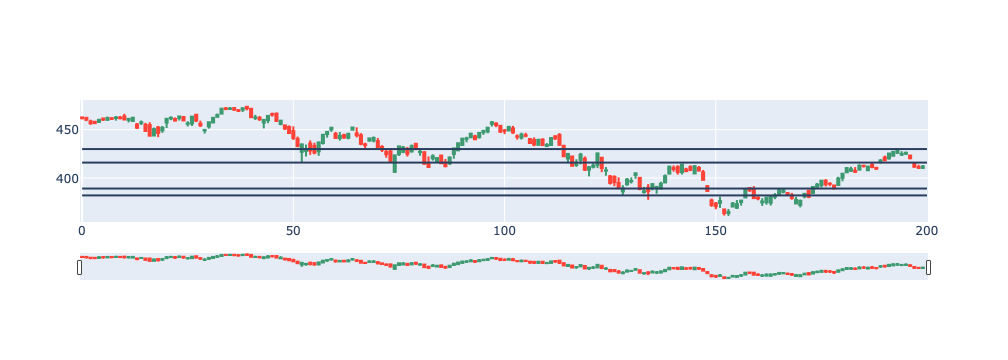

In [143]:
s = 0
e = 200
dfpl = sr_df[s:e]
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.pyplot as plt

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

c=0
while (1):
    if(c>len(sr)-1 ):#or sr[c][0]>e
        break
    fig.add_shape(type='line', x0=s, y0=sr[c][1],
                  x1=e,
                  y1=sr[c][1]
                  )#x0=sr[c][0]-5 x1=sr[c][0]+5
    c+=1
fig.show()

In [144]:
plotlist1 = [x[1] for x in sr if x[2]==1]
plotlist2 = [x[1] for x in sr if x[2]==2]
plotlist1.sort()
plotlist2.sort()

for i in range(1,len(plotlist1)):
    if(i>=len(plotlist1)):
        break
    if abs(plotlist1[i]-plotlist1[i-1])<=0.005:
        plotlist1.pop(i)

for i in range(1,len(plotlist2)):
    if(i>=len(plotlist2)):
        break
    if abs(plotlist2[i]-plotlist2[i-1])<=0.005:
        plotlist2.pop(i)
plotlist2
#plt.hist(plotlist, bins=10, alpha=0.5)

[389.0418979580837, 429.963802202433]

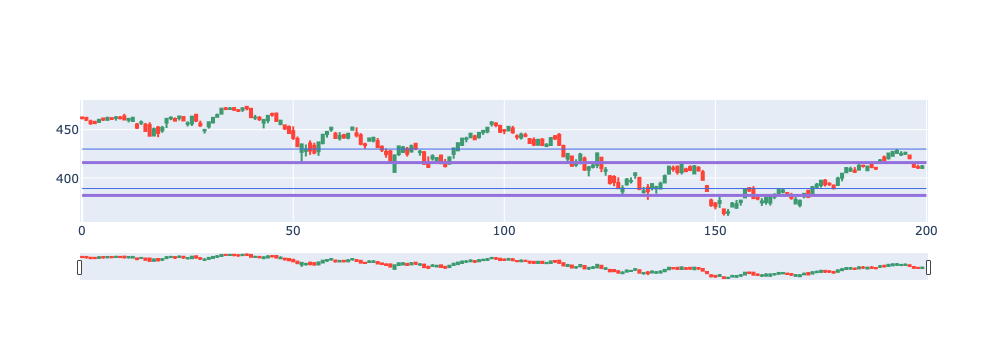

In [145]:
s = 0
e = 200
dfpl = sr_df[s:e]
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.pyplot as plt

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

c=0
while (1):
    if(c>len(plotlist1)-1 ):#or sr[c][0]>e
        break
    fig.add_shape(type='line', x0=s, y0=plotlist1[c],
                  x1=e,
                  y1=plotlist1[c],
                  line=dict(color="MediumPurple",width=3)
                  )
    c+=1

c=0
while (1):
    if(c>len(plotlist2)-1 ):#or sr[c][0]>e
        break
    fig.add_shape(type='line', x0=s, y0=plotlist2[c],
                  x1=e,
                  y1=plotlist2[c],
                  line=dict(color="RoyalBlue",width=1)
                  )
    c+=1    

fig.show()

In [146]:
ss = []
rr = []
n1=4
n2=3
for row in range(n1, (len(sr_df)-n2)): #len(df)-n2
    if support(sr_df, row, n1, n2):
        ss.append((row,sr_df.Low[row]))
    if resistance(df, row, n1, n2):
        rr.append((row,sr_df.High[row]))

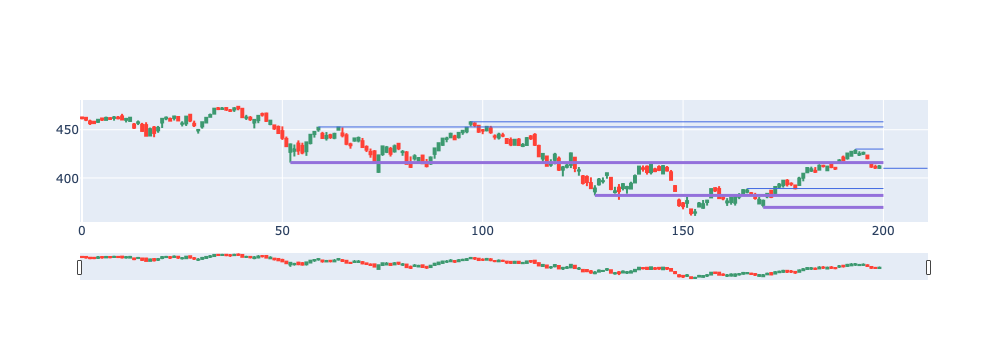

In [147]:
s = 0
e = 200
dfpl = sr_df[s:e]
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.pyplot as plt

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

c=0
while (1):
    if(c>len(ss)-1 ):
        break
    fig.add_shape(type='line', x0=ss[c][0], y0=ss[c][1],
                  x1=e,
                  y1=ss[c][1],
                  line=dict(color="MediumPurple",width=3)
                  )
    c+=1

c=0
while (1):
    if(c>len(rr)-1 ):
        break
    fig.add_shape(type='line', x0=rr[c][0], y0=rr[c][1],
                  x1=e,
                  y1=rr[c][1],
                  line=dict(color="RoyalBlue",width=1)
                  )
    c+=1    

    
fig.show()

In [148]:
import MeanRevBacktester as MeanRev

In [149]:
date = df.copy()
date = date.reset_index()
beg = date.iloc[0]["Date"]
end = date.iloc[-1]["Date"]
display(beg)
display(end)

Timestamp('2021-11-08 00:00:00')

Timestamp('2022-11-07 00:00:00')

In [150]:
# Spread /fee 
trading_costs = 0.00007

tester = MeanRev.MeanRevBacktester('Close', 30, 2, beg, end, trading_costs)

In [151]:
optimize = tester.optimize_parameters((25, 100, 1), (1, 5, 1))
num = optimize[0]
num

(30, 2)

In [152]:
data = pd.read_csv("SPY.csv", index_col="Date")
data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-11-01,390.140015,390.390015,383.290009,384.519989,85407600
2022-11-02,383.899994,388.630005,374.760010,374.869995,126990400
2022-11-03,371.470001,374.200012,368.790009,371.010010,87100100
2022-11-04,377.000000,378.869995,370.000000,376.350006,103449600
2022-11-07,377.709991,380.570007,375.529999,379.950012,68116400


In [153]:
data = data.drop(columns = ['Volume', 'Open', 'High', 'Low'])

In [154]:
data['daily_returns'] = data.Close.pct_change()
data.head()

,Close,daily_returns
Date,,
2021-11-08,461.939880,NaN
2021-11-09,460.412994,-0.003305
2021-11-10,456.709076,-0.008045
2021-11-11,456.856812,0.000323
2021-11-12,460.304626,0.007547


In [155]:
import numpy as np

In [156]:
# Bollinger Bands Trading Strategy 

# Set SMA and standard deviations 
SMA = num[0]
dev = num[1]


# Creating column to hold SMA
data["SMA"] = data["Close"].rolling(SMA).mean()

# Creating the lower band 
data["Lower"] = data["SMA"] - data["Close"].rolling(SMA).std() * dev 

# Creating the upper band
data["Upper"] = data["SMA"] + data["Close"].rolling(SMA).std() * dev 

# Creating a column for distance between closing price and the SMA
data["distance"] = data.Close - data.SMA # helper Column

# Creating a column to add a 1 if oversold to go long 
data["position"] = np.where(data.Close < data.Lower, 1, np.nan) # 1. oversold -> go long

# Adding a -1 to the 'position' row if overbought to go short 
data["position"] = np.where(data.Close > data.Upper, -1, data["position"]) # 2. overbought -> go short

# Adding a 0 to the 'position' column to close position when passes SMA 
data["position"] = np.where(data.distance * data.distance.shift(1) < 0, 0, data["position"])

# If 1-3 isn't met the previous position is held 
data["position"] = data.position.ffill().fillna(0) # where 1-3 isn´t applicable -> hold previous position

# Creating a column for strategy returns
data["strategy_returns"] = data.position.shift(1) * data["daily_returns"]

In [157]:
# data.dropna(inplace=True)

In [158]:
data = data.reset_index()
data.tail()

,Date,Close,daily_returns,SMA,Lower,Upper,distance,position,strategy_returns
247,2022-11-01,384.519989,-0.004376,370.834001,352.007353,389.660648,13.685988,0.0,-0.0
248,2022-11-02,374.869995,-0.025096,370.750000,352.022166,389.477834,4.119995,0.0,-0.0
249,2022-11-03,371.010010,-0.010297,370.643000,351.960578,389.325423,0.367009,0.0,-0.0
250,2022-11-04,376.350006,0.014393,370.923000,352.155992,389.690008,5.427006,0.0,0.0
251,2022-11-07,379.950012,0.009566,371.444334,352.568859,390.319809,8.505678,0.0,0.0


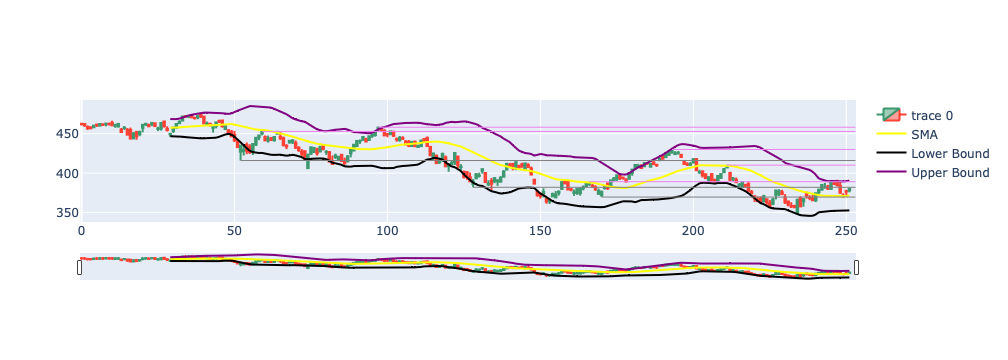

In [159]:
s = 0
e = (len(data.index) + 1)
dfpl = sr_df[s:e]
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.pyplot as plt

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

fig.add_trace(go.Scatter(
    x=data.index,
    y=data['SMA'],
    mode="lines",
    name="SMA",
    line_color="yellow", 
))

fig.add_trace(go.Scatter(
    x=data.index,
    y=data['Lower'],
    mode="lines",
    name="Lower Bound",
    line_color="Black", 
    
))

fig.add_trace(go.Scatter(
    x=data.index,
    y=data['Upper'],
    mode="lines",
    name="Upper Bound",
    line_color="Purple"
))

c=0
while (1):
    if(c>len(ss)-1 ):
        break
    fig.add_shape(type='line', x0=ss[c][0], y0=ss[c][1],
                  x1=e,
                  y1=ss[c][1],
                  line=dict(color="gray",width=1)
                  )
    c+=1

c=0
while (1):
    if(c>len(rr)-1 ):
        break
    fig.add_shape(type='line', x0=rr[c][0], y0=rr[c][1],
                  x1=e,
                  y1=rr[c][1],
                  line=dict(color="violet",width=1)
                  )
    c+=1    

# fig.add_shape(go.Scatter(
#     x=(data[data["position"]==1].index),
#     y=data['Close'],
#     text="dot",
# ))
    
fig.show()